In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv'
bikes = pd.read_csv(url)

# Convert date column to datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

# Create a new target variable for total bike rentals
bikes['count'] = bikes['casual'] + bikes['registered']

# Select relevant features
features = ['temp_c', 'feels_like_c', 'hum', 'windspeed', 'hr',
            'weathersit', 'season', 'holiday', 'workingday']
target = 'count'

# Define features (X) and target (y)
X = bikes[features]
y = bikes[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set random seed for reproducibility
tf.random.set_seed(42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 244.1471 - mean_absolute_error: 244.1471 - val_loss: 188.7186 - val_mean_absolute_error: 188.7186
Epoch 2/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 186.9956 - mean_absolute_error: 186.9956 - val_loss: 177.2478 - val_mean_absolute_error: 177.2478
Epoch 3/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 176.1982 - mean_absolute_error: 176.1982 - val_loss: 167.4483 - val_mean_absolute_error: 167.4483
Epoch 4/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 167.0503 - mean_absolute_error: 167.0503 - val_loss: 160.1464 - val_mean_absolute_error: 160.1464
Epoch 5/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 160.4577 - mean_absolute_error: 160.4577 - val_loss: 155.7474 - val_mean_absolute_error: 155.7474
Epoch 6/100
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 156.7384 - mean_absolute_error: 156.7384 - val_loss: 153.0926 - val_mean_absolute_error: 153.0926
Epoch 7/100
2812/2812 ━━━━━━━━━━

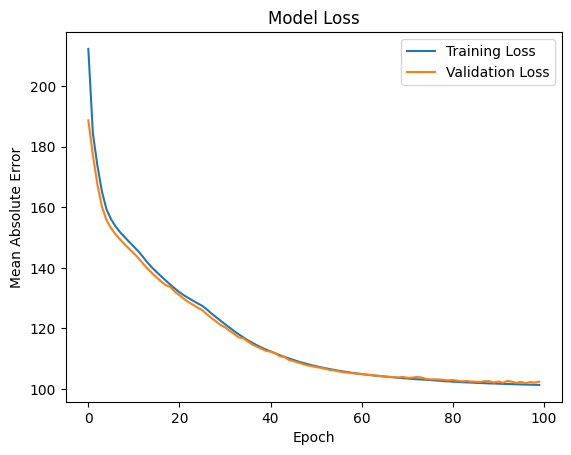

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 102.4750 - mean_absolute_error: 102.4750
Test MAE: 102.45592498779297


In [4]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae}')